In [3]:
import numpy as np
data = np.loadtxt('C:/Users/Nicolas Prst/Downloads/TP_RN1_2020/dataset.dat')

In [4]:
X = data[:,0:2]
y = data[:,2]
y = y.astype(int)

In [5]:
data.shape

(300, 3)

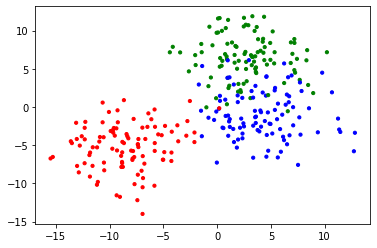

In [8]:
#visualiser les données
from matplotlib import pyplot
colors = np.array([x for x in "rgbcmyk"])
pyplot.scatter(X[:, 0], X[:, 1], color=colors[y].tolist(), s=10)
pyplot.show()

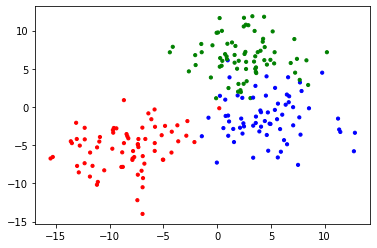

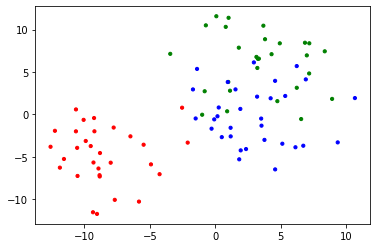

In [9]:
#partition des données
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)
pyplot.scatter(X_train[:, 0], X_train[:, 1], color=colors[y_train].tolist(), s=10)
pyplot.show()
pyplot.scatter(X_test[:, 0], X_test[:, 1], color=colors[y_test].tolist(), s=10)
pyplot.show()

In [14]:
X_train.shape

(210, 2)

In [15]:
X_test.shape

(90, 2)

In [7]:
#classification des voisins
from sklearn.neighbors import KNeighborsClassifier
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
one_NN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [8]:
#score sur la base d'apprentissage
print('Accuraccy on training set:', one_NN.score(X_train, y_train))
print('Accuraccy on testing set:', one_NN.score(X_test, y_test))

Accuraccy on training set: 1.0
Accuraccy on testing set: 0.8777777777777778


In [9]:
#matrice de confusion
from sklearn import metrics
y_pred_test = one_NN.predict(X_test)
metrics.confusion_matrix(y_test, y_pred_test)

array([[30,  0,  0],
       [ 0, 21,  2],
       [ 1,  8, 28]], dtype=int64)

In [10]:
# Créer une grille
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h),
np.arange(y_min, y_max, y_h))
Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)

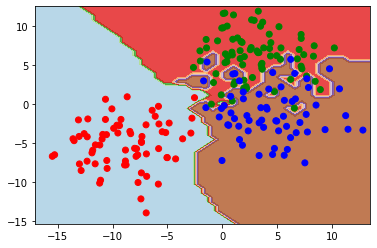

In [11]:
#afficher les frontières/données d'apprentissage
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_train[:, 0], X_train[:, 1], cmap=pyplot.cm.Paired, color=colors[y_train].tolist())
pyplot.xlim(xx.min(), xx.max())
pyplot.ylim(yy.min(), yy.max())
pyplot.show()